<a href="https://colab.research.google.com/github/arijitd60/arijitd60/blob/main/decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees
Load the `mnist` dataset. Split it into training and test sets. Train and test a decision tree model using scikit-learn. Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

Importing Modules

In [18]:
import pandas as pd
import sklearn.model_selection
import sklearn.tree
import sklearn.metrics
import plotly.express as px

Loading the Dataset

In [2]:
df = pd.read_csv("mnist.csv")
df.head()

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,31953,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,34452,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,60897,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,36953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1981,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Splitting the Dataset into Train and Test sets

In [5]:
x = df.drop(["class"], axis=1)
y = df["class"]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y)
print("df:", df.shape)
print("x:", x.shape)
print("y:", y.shape)
print("x_train:", x_train.shape)
print("x_test:", x_train.shape)
print("y_train:", x_train.shape)
print("y_test:", x_train.shape)

df: (4000, 786)
x: (4000, 785)
y: (4000,)
x_train: (3000, 785)
x_test: (3000, 785)
y_train: (3000, 785)
y_test: (3000, 785)


Training a Decision Model

In [7]:
model = sklearn.tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Testing the Trained Model

In [9]:
y_predicted = model.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
print("Accuracy =", accuracy)

cm = sklearn.metrics.confusion_matrix(y_test, y_predicted)
cm

Accuracy = 0.759


array([[ 84,   0,   3,   0,   2,   6,   5,   0,   2,   2],
       [  1, 109,   2,   2,   0,   2,   0,   3,   9,   1],
       [  3,   1,  69,   0,   4,   3,   5,   8,   8,   0],
       [  1,   2,   4,  67,   2,   4,   1,   3,   9,   4],
       [  1,   2,   0,   1,  70,   2,   2,   0,   2,   3],
       [  1,   2,   2,   5,   0,  64,   2,   2,   6,   2],
       [  1,   1,   6,   3,   1,   5,  62,   1,   6,   5],
       [  0,   1,   2,   5,   3,   0,   1,  86,   1,   7],
       [  4,   1,   2,   6,  10,   5,   3,   0,  74,   1],
       [  1,   1,   1,   3,   7,   0,   2,   5,   3,  74]])

HyperParameter Tuning

In [15]:
min_samples_split_list = range(2,10)
criterion_list = ["gini", "entropy"]
result_df = pd.DataFrame(columns=["min_samples_split", "criterion", "Accuracy"])

for k in min_samples_split_list:
  for criterion in criterion_list:
    model = sklearn.tree.DecisionTreeClassifier(criterion=criterion, min_samples_split=k)
    model.fit(x_train, y_train)
    y_predicted = model.predict(x_test)
    accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
    result_df = result_df.append({"min_samples_split": k, "criterion": criterion, "Accuracy": accuracy}, ignore_index=True)

    result_df

Visualize

In [20]:
k_df = result_df[result_df["criterion"]=="gini"]

fig = px.line(x=k_df["min_samples_split"], y=k_df["Accuracy"], labels={'x':'min_samples_split', 'y':'Accuracy'})
fig.show()

In [21]:
criterion_df = result_df[result_df["min_samples_split"]==4]

fig = px.bar(criterion_df, x='criterion', y='Accuracy')
fig.show()

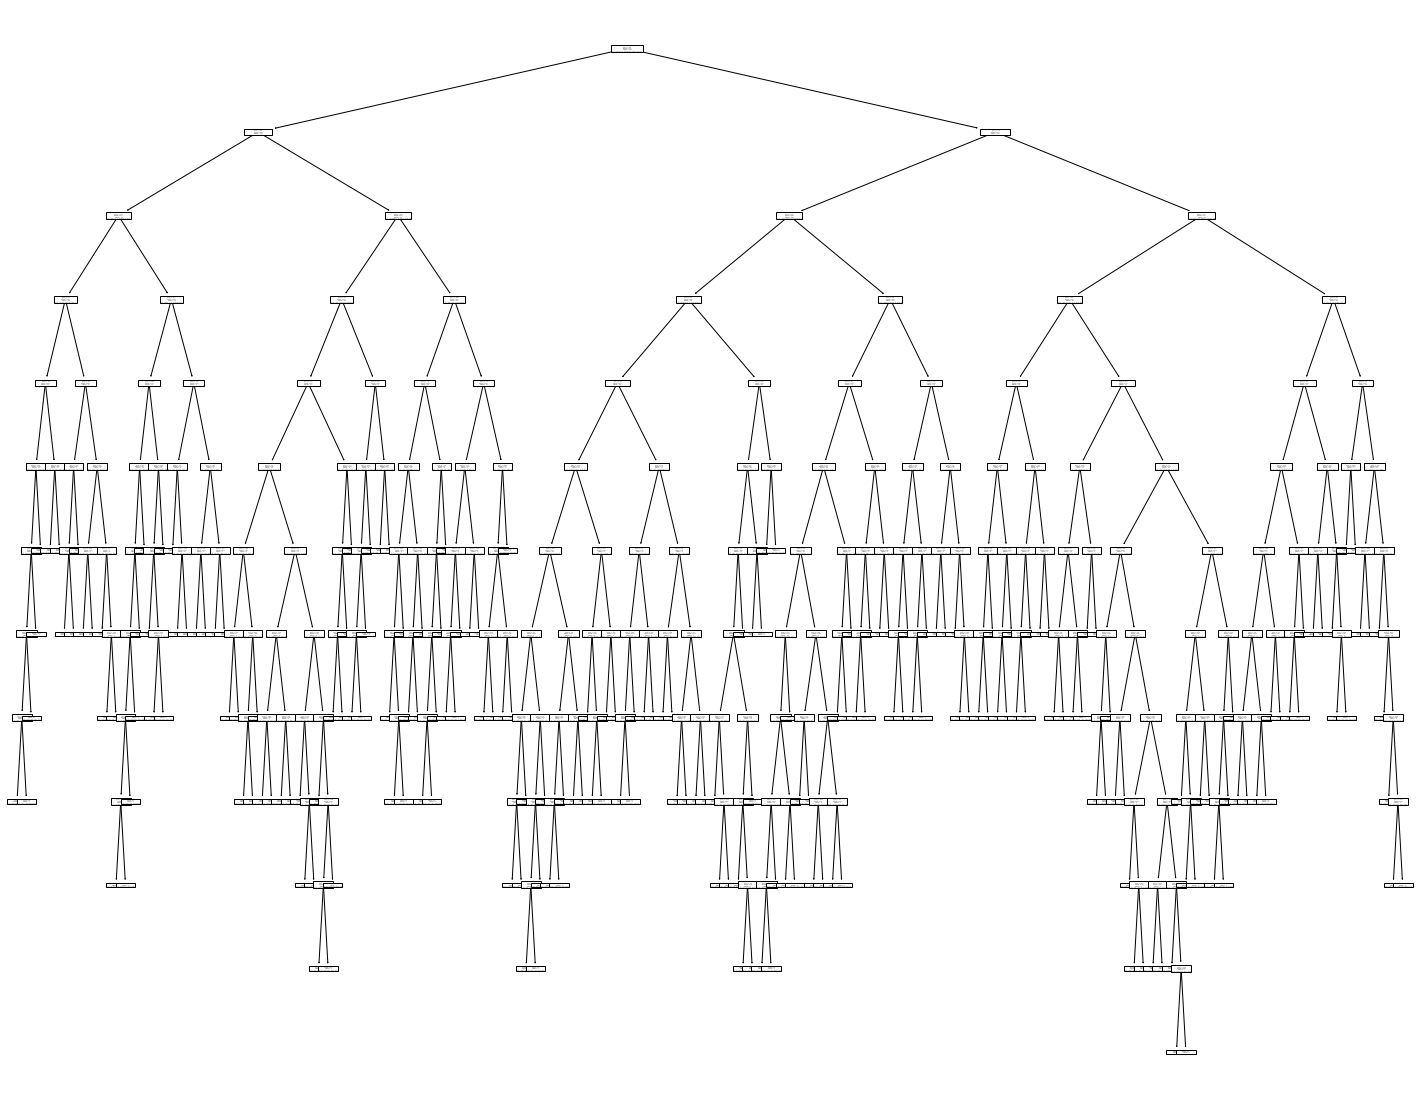

In [23]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(model);